In [22]:
import json
import os

import pandas as pd
import matplotlib.pyplot as plt

In [80]:
experiments = [
    'convmixer256_8_k5_p1_00', 'convmixer256_8_k5_p1_01', 'convmixer256_8_k5_p1_02',
    'convmixer256_8_k5_p2_00', 'convmixer256_8_k5_p2_01', 'convmixer256_8_k5_p2_02',
    # 'convmixer256_8_k9_p1_00', 'convmixer256_8_k9_p1_01','convmixer256_8_k9_p1_02',
    'convmixer256_8_k9_p2_00', 'convmixer256_8_k9_p2_01', 'convmixer256_8_k9_p2_02',
                                                          'convmixer256_16_k9_p2_00'
]
final_results = 'convmixer256_8_k5_p2_05'
resnset_s_results = 'resnet_s38_default'

In [38]:
data = []
for _, experiment in enumerate(experiments):
    print(experiment)
    df = pd.read_json(f"../logs/{experiment}/train_{experiment}").T
    data.append(df)

convmixer256_8_k5_p1_00
convmixer256_8_k5_p1_01
convmixer256_8_k5_p1_02
convmixer256_8_k5_p2_00
convmixer256_8_k5_p2_01
convmixer256_8_k5_p2_02
convmixer256_8_k9_p2_00
convmixer256_8_k9_p2_01
convmixer256_8_k9_p2_02
convmixer256_16_k9_p2_00


,train_loss,train_acc,val_loss,val_acc,lr,t_epoch
0,1.233324,0.547990,0.974074,0.654515,0.002130,173.157203
1,0.757800,0.733006,0.777006,0.734375,0.002522,176.002970
2,0.562021,0.805841,0.555897,0.806319,0.003171,177.201118
3,0.455409,0.844333,0.521311,0.831870,0.004070,177.606858
4,0.399835,0.863462,0.502831,0.825057,0.005209,177.537290


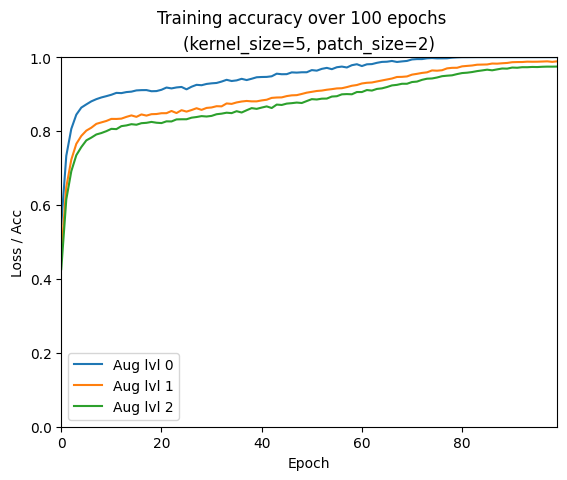

In [79]:
plt.figure()
sample = experiments[3:6]
labels = ["Aug lvl 0", "Aug lvl 1", "Aug lvl 2"]
for idx, experiment in enumerate(sample):
    plt.plot(data[idx].train_acc, label=labels[idx])
plt.legend()
plt.xlabel('Epoch')
plt.xlim(0,99)
plt.ylabel('Loss / Acc')
plt.ylim(0,1.0)
plt.suptitle("Training accuracy over 100 epochs")
plt.title("(kernel_size=5, patch_size=2)")
plt.savefig("../publish/images/training_k5p2.png", dpi=300)
plt.show()

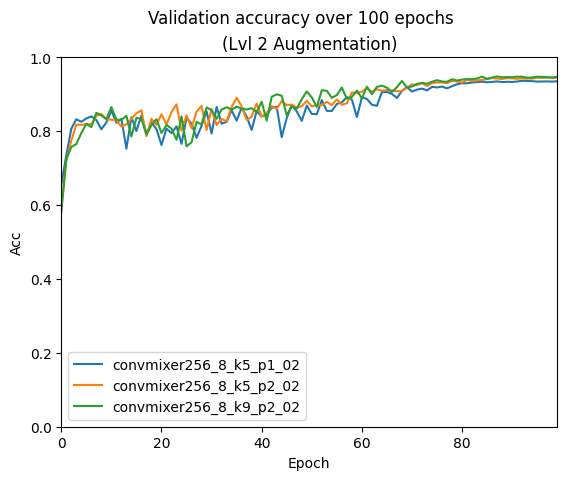

In [91]:
plt.figure()
sample = experiments[2::3]
for idx, experiment in enumerate(sample):
    plt.plot(data[idx].val_acc, label=sample[idx])
plt.legend()
plt.xlabel('Epoch')
plt.xlim(0,99)
plt.ylabel('Acc')
plt.ylim(0,1.0)
plt.suptitle("Validation accuracy over 100 epochs")
plt.title("(Lvl 2 Augmentation)")
plt.savefig("../publish/images/val_lvl2.png", dpi=300)
plt.show()

In [81]:
data_final = []

df = pd.read_json(f"../logs/{final_results}/train_{final_results}").T
data_final.append(df)
df = pd.read_json(f"../logs/{resnset_s_results}/train_{resnset_s_results}").T
data_final.append(df)

In [97]:
data_final[0]

,train_loss,train_acc,val_loss,val_acc,lr,t_epoch
0,1.839496,0.332784,1.278658,0.515485,2.032160e-03,88.847204
1,1.589955,0.450936,1.021049,0.646409,2.130035e-03,89.682092
2,1.470739,0.503228,0.847287,0.718005,2.293361e-03,90.859454
3,1.370851,0.550730,0.773567,0.733386,2.521690e-03,90.191366
4,1.217015,0.596004,0.646971,0.775462,2.814395e-03,89.973333
...,...,...,...,...,...,...
195,0.531506,0.850065,0.177618,0.957848,1.008422e-04,87.283677
196,0.461758,0.873974,0.147886,0.958299,5.682790e-05,87.251449
197,0.582558,0.841107,0.191971,0.957203,2.537324e-05,87.330917
198,0.471705,0.867932,0.154704,0.958689,6.494101e-06,86.975997


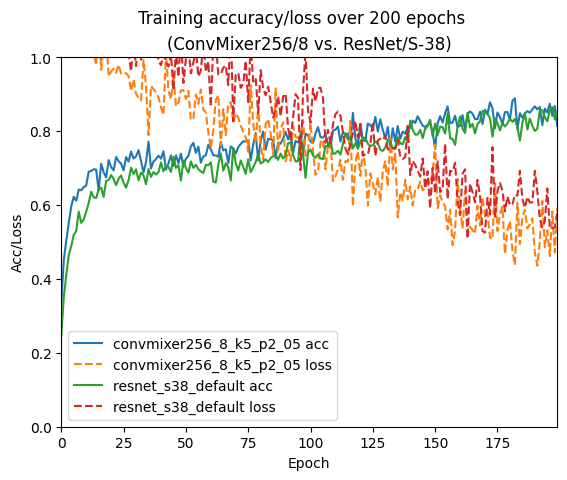

In [100]:
plt.figure()
samples = [final_results, resnset_s_results]
for idx, experiment in enumerate(samples):
    plt.plot(data_final[idx].train_acc, label=f"{experiment} acc")
    plt.plot(data_final[idx].train_loss, linestyle='dashed', label=f"{experiment} loss")
plt.legend()
plt.xlabel('Epoch')
plt.xlim(0,199)
plt.ylabel('Acc/Loss')
plt.ylim(0,1.0)
plt.suptitle("Training accuracy/loss over 200 epochs")
plt.title("(ConvMixer256/8 vs. ResNet/S-38)")
plt.savefig("../publish/images/final_training.png", dpi=300)
plt.show()

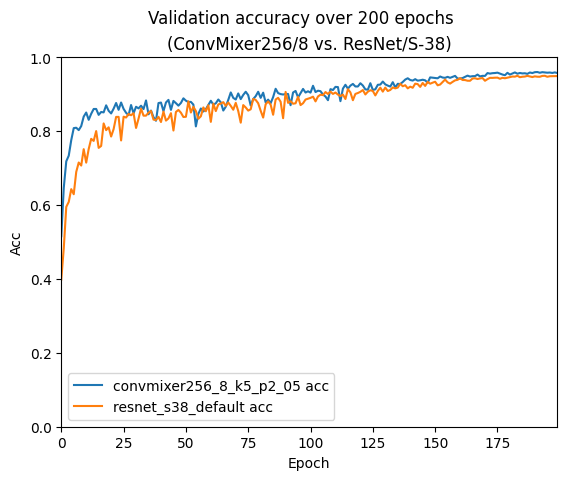

In [102]:
plt.figure()
samples = [final_results, resnset_s_results]
for idx, experiment in enumerate(samples):
    plt.plot(data_final[idx].val_acc, label=f"{experiment} acc")
plt.legend()
plt.xlabel('Epoch')
plt.xlim(0,199)
plt.ylabel('Acc')
plt.ylim(0,1.0)
plt.suptitle("Validation accuracy over 200 epochs")
plt.title("(ConvMixer256/8 vs. ResNet/S-38)")
plt.savefig("../publish/images/final_validation.png", dpi=300)
plt.show()